In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_CLAY.csv') as Shrewsbury_CLAY:
    df_Shrewsbury_CLAY=pd.read_csv(Shrewsbury_CLAY)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_323704\2579429382.py:2: DtypeWarning: Columns (24,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Shrewsbury_CLAY=pd.read_csv(Shrewsbury_CLAY)


In [4]:
len(df_Shrewsbury_CLAY['CLAY'])

24972

In [5]:
df_Shrewsbury_CLAY['CLAY'].unique()

array([2. , 7. , 7.3, 4. , 5.4, 8. , 9. , 9.5, 6. , 4.6, 1. ])

In [6]:
len(df_Shrewsbury_CLAY['CLAY'].unique())

11

In [7]:
unique_clay=df_Shrewsbury_CLAY['CLAY'].unique()

In [8]:
type(unique_clay)

numpy.ndarray

In [9]:
# plotting histogram for CLAY
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#sns.displot(data=df_Shrewsbury_CLAY, x="CLAY", kind="hist", bins = 50, aspect = 1.5)

In [10]:
# plotting histogram for CLAY
#plt.hist(df_Shrewsbury_CLAY['CLAY'], log=True)
#plt.xlabel('CLAY%')
#plt.show

In [11]:
df_Shrewsbury_CLAY['log_CLAY'] = np.log10(df_Shrewsbury_CLAY['CLAY'])

In [12]:
df_Shrewsbury_CLAY['log_CLAY'].unique()

array([0.30103   , 0.84509804, 0.86332286, 0.60205999, 0.73239376,
       0.90308999, 0.95424251, 0.97772361, 0.77815125, 0.66275783,
       0.        ])

In [35]:
len(df_Shrewsbury_CLAY['log_CLAY'].unique())

11

In [36]:
value_counts['log_CLAY']

0     0.85
1     0.86
2     0.30
3     0.95
4     0.73
5     0.90
6     0.60
7     0.78
8     0.98
9     0.00
10    0.66
Name: log_CLAY, dtype: float64

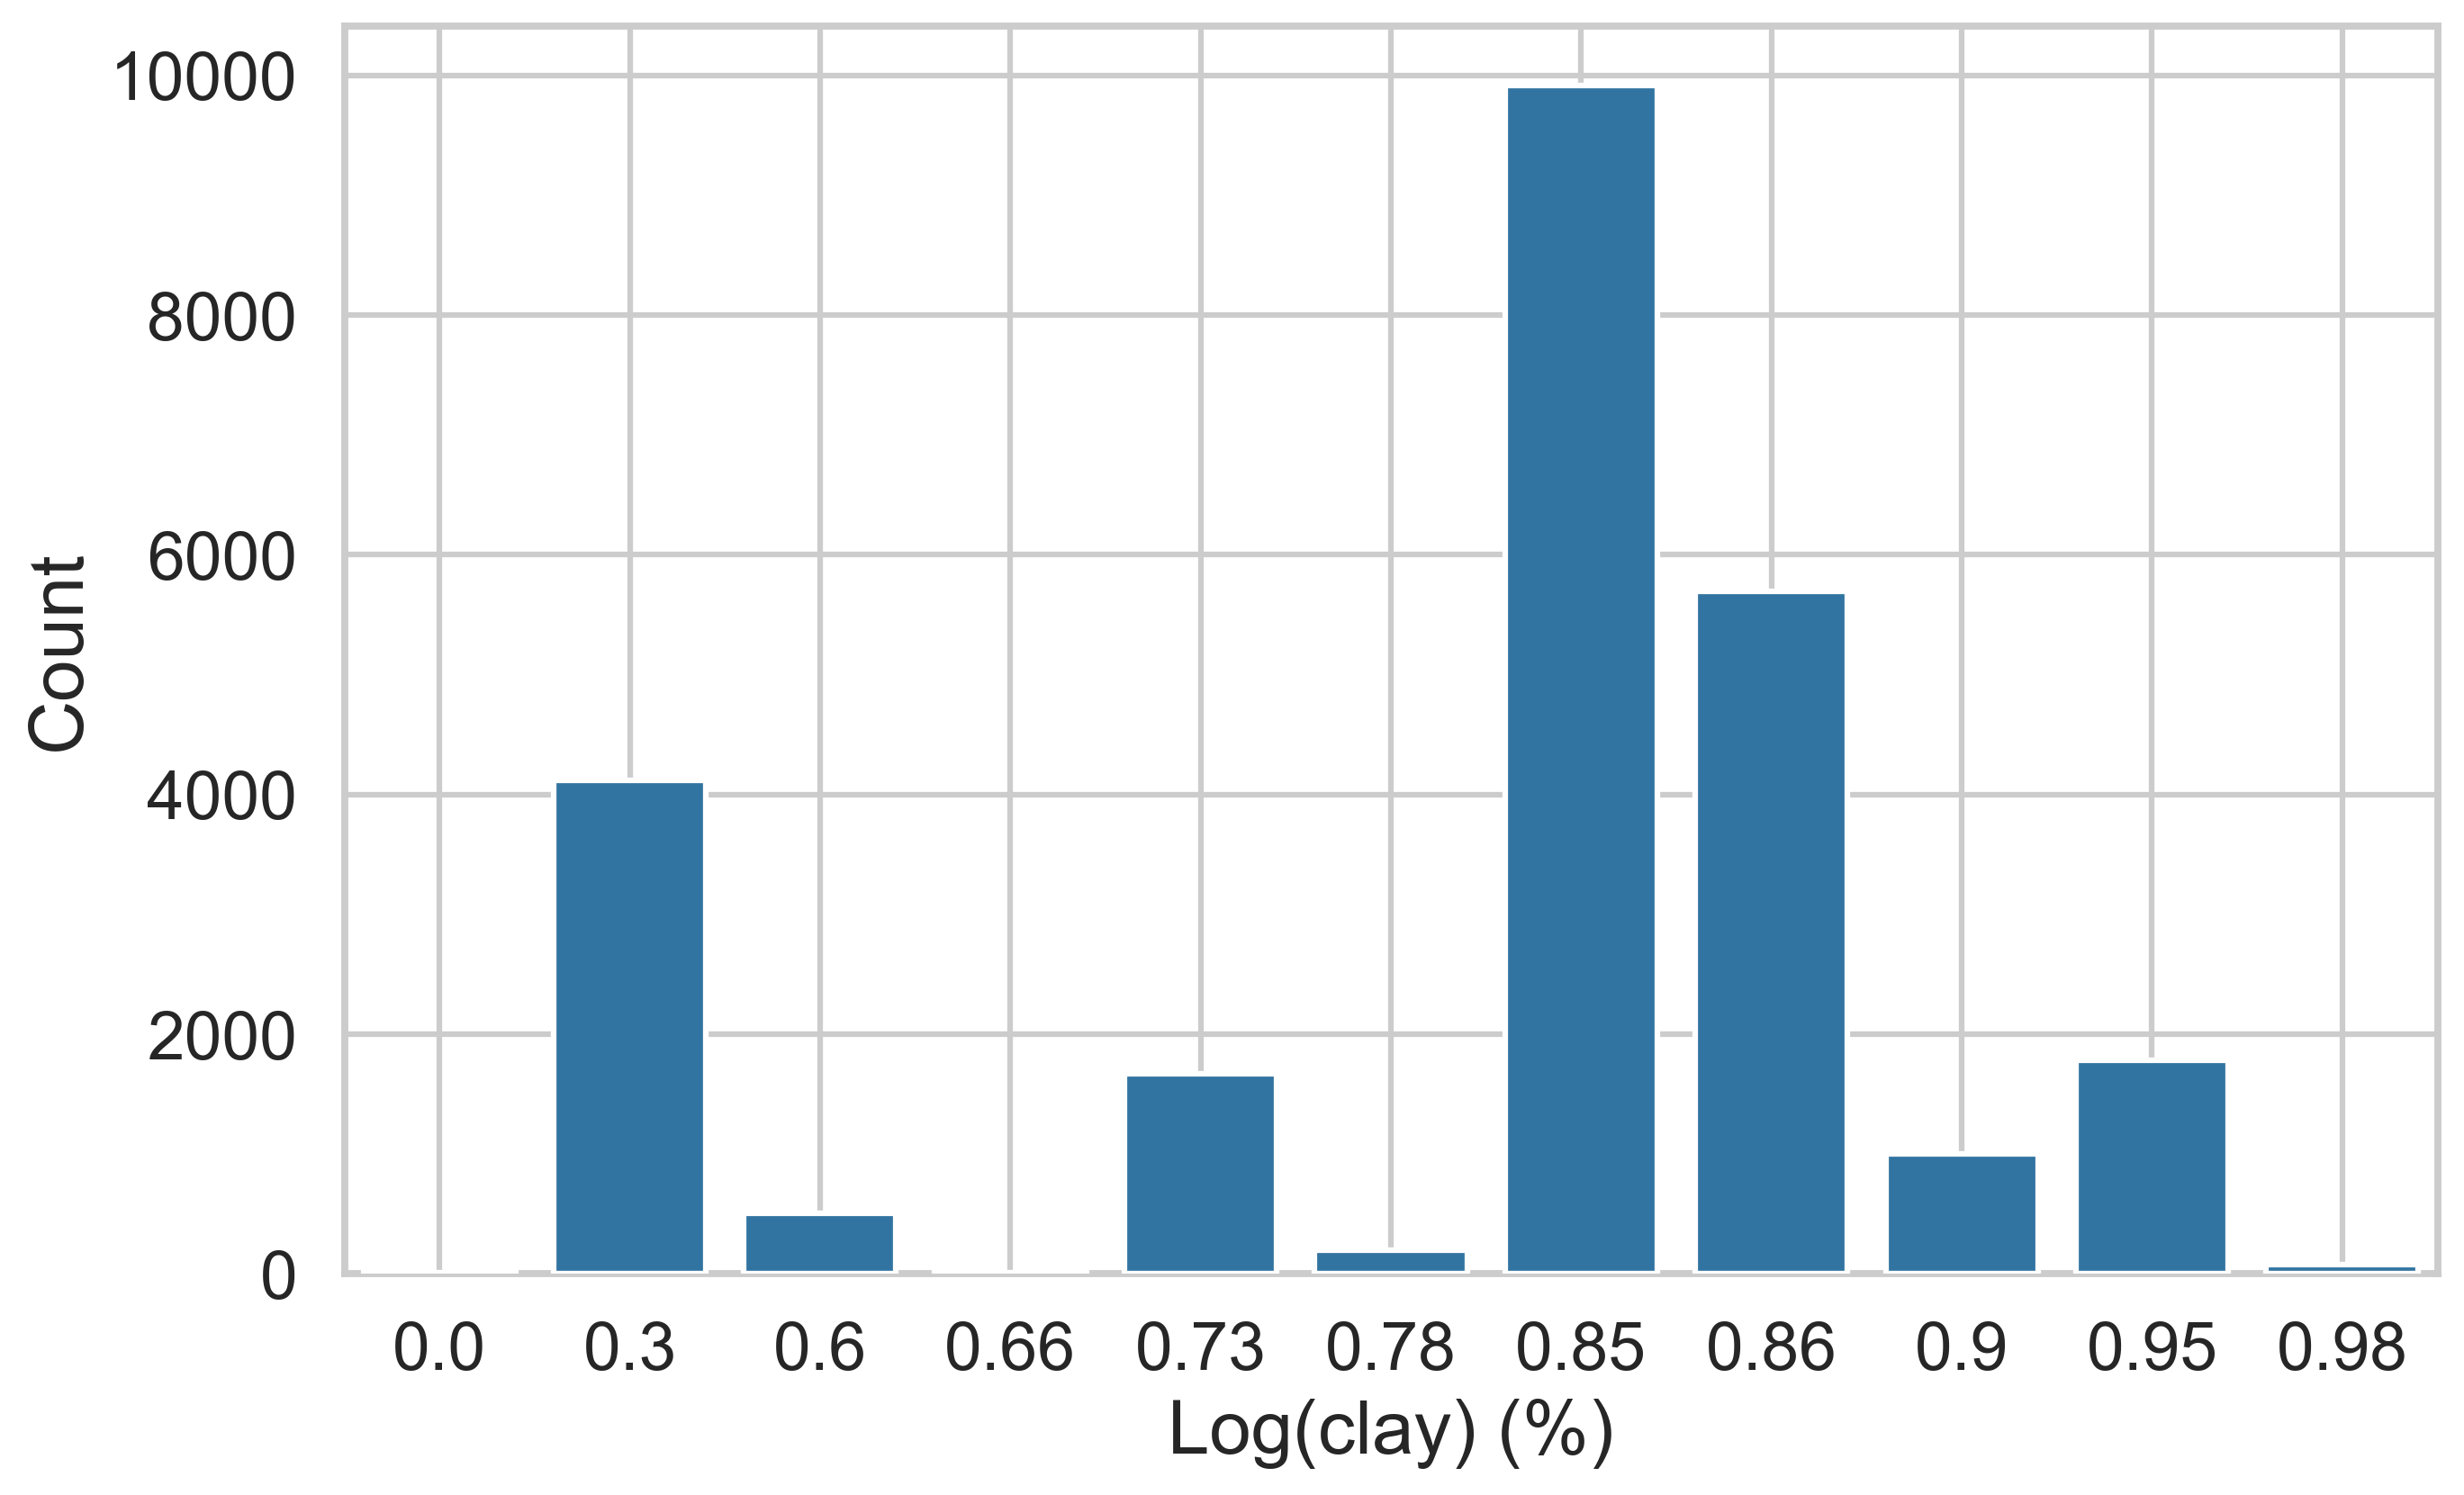

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data creation for demonstration
# df_Shrewsbury_CLAY = pd.DataFrame({'log_CLAY': [some categorical values]})

# Set style and context
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.4)

# Calculate counts
value_counts = df_Shrewsbury_CLAY['log_CLAY'].value_counts().reset_index()
value_counts.columns = ['log_CLAY', 'Count']
value_counts['log_CLAY'] = value_counts['log_CLAY'].round(2)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
sns.barplot(data=value_counts, x='log_CLAY', y='Count', ax=ax, zorder=3)

# Set labels and title
ax.set_xlabel('Log(clay) (%)', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=18)


# Bring grid lines to back
ax.grid(True, zorder=0)

# Save the plot
plt.savefig(r'../../figures/Shrewsbury_log_Clay.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


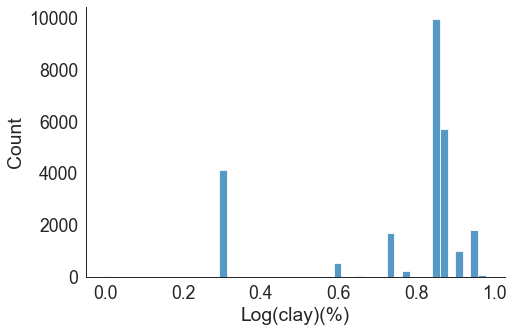

In [14]:
# plotting histogram for log_CLAY
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
ax=sns.displot(data=df_Shrewsbury_CLAY, x="log_CLAY", kind="hist", bins = 50, aspect = 1.5)
ax.set(xlabel='Log(clay)(%)', ylabel='Count')
plt.savefig(r'../../figures/Shrewsbury_log_Clay.png', dpi=300 ,bbox_inches='tight')

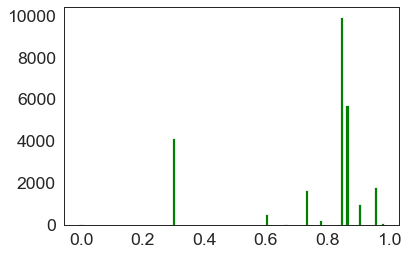

In [107]:
unique= df_Shrewsbury_CLAY['log_CLAY'].unique()
count=[]
for i in unique:
    df=df_Shrewsbury_CLAY.loc[df_Shrewsbury_CLAY.log_CLAY==i]
    count.append(len(df.index))
#print(count)
myDictionary= {unique[0]: count[0], unique[1]: count[1], unique[2]: count[2], unique[3]: count[3], unique[4]: count[4], unique[5]: count[5], unique[6]: count[6], unique[7]: count[7], unique[8]: count[8], unique[9]: count[9], unique[10]: count[10]}
#myDictionary
plt.bar(list(myDictionary.keys()), myDictionary.values(), width=0.01 ,color='g')
plt.show()

In [109]:
unique

array([0.30103   , 0.84509804, 0.86332286, 0.60205999, 0.73239376,
       0.90308999, 0.95424251, 0.97772361, 0.77815125, 0.66275783,
       0.        ])

In [111]:
unique.sort()

In [112]:
unique

array([0.        , 0.30103   , 0.60205999, 0.66275783, 0.73239376,
       0.77815125, 0.84509804, 0.86332286, 0.90308999, 0.95424251,
       0.97772361])

In [114]:
# generating probabilities for all 11 possible options of log_CLAY
multinomial_dic = {}
for i in unique:
    A=df_Shrewsbury_CLAY[df_Shrewsbury_CLAY.log_CLAY == i].shape[0]/len(df_Shrewsbury_CLAY.index)
    multinomial_dic[i] = A
multinomial_dic

{0.0: 0.00044049335255486147,
 0.3010299956639812: 0.16490469325644722,
 0.6020599913279624: 0.020222649367291366,
 0.6627578316815741: 0.0002402691013935608,
 0.7323937598229685: 0.06671472048694538,
 0.7781512503836436: 0.007848790645522985,
 0.8450980400142568: 0.39696460035239467,
 0.8633228601204559: 0.22817555662341824,
 0.9030899869919435: 0.04008489508249239,
 0.9542425094393249: 0.07144001281435207,
 0.9777236052888477: 0.0029633189171872497}

In [124]:
sum(multinomial_dic.values())

1.0

In [127]:
multinomial_dic
k=3
res = {key : round(multinomial_dic[key], 4) for key in multinomial_dic}
res

{0.0: 0.0004,
 0.3010299956639812: 0.1649,
 0.6020599913279624: 0.0202,
 0.6627578316815741: 0.0002,
 0.7323937598229685: 0.0667,
 0.7781512503836436: 0.0078,
 0.8450980400142568: 0.397,
 0.8633228601204559: 0.2282,
 0.9030899869919435: 0.0401,
 0.9542425094393249: 0.0714,
 0.9777236052888477: 0.003}

In [ ]:
values = a_dict. values() Return values of a dictionary.
total = sum(values) Compute sum of the values.
print(total)

,sumsquare_error,aic,bic,kl_div
norm,2437.467313,216.692026,-5.808449e+04,inf
beta,inf,inf,inf,inf
burr,inf,inf,inf,inf
gamma,inf,inf,inf,inf
lognorm,inf,inf,inf,inf


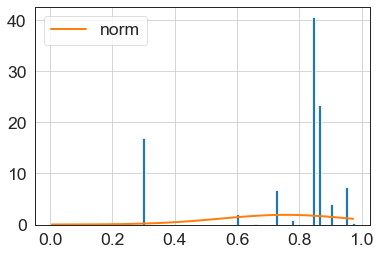

In [36]:
CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,2437.467313,216.692026,-58084.490789,inf


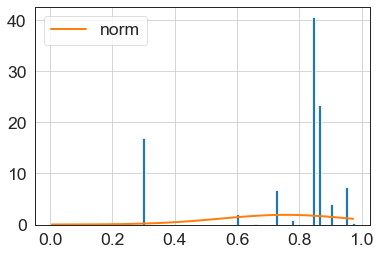

In [37]:
CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(CLAY,
           distributions=["norm"])
f.fit()
f.summary()

In [15]:
#CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
#f = Fitter(CLAY)
#f.fit()
#f.summary()

In [ ]:
log_CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(log_CLAY,
           distributions=['cauchy',
                          'chi2',
                          'expon',
                          'exponpow',
                          'gamma',
                          'lognorm',
                          'norm',
                          'powerlaw',
                          'rayleigh',
                          'uniform',
                          'logistic'])
f.fit()
f.summary()

In [26]:
# We can see that the burr distribution is the best fit based on the sumsquare_error criteria.

In [27]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.7566765898579608, 'scale': 0.21097045056949185}}

In [38]:
f.fitted_param['norm']

(0.7566765898579608, 0.21097045056949185)

,sumsquare_error,aic,bic,kl_div
norm,2437.467313,216.692026,-5.808449e+04,inf
gamma,inf,inf,inf,inf
lognorm,inf,inf,inf,inf
burr,inf,inf,inf,inf
beta,inf,inf,inf,inf


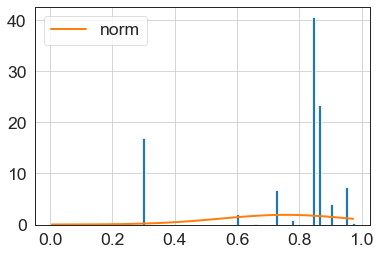

In [30]:
f = Fitter(log_CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()